In [36]:
import sqlite3

In [37]:
from datetime import date

database_name="AAk_test.db"
table_name='books'

connec = sqlite3.connect(database_name)
cursor = connec.cursor()

cursor.execute(f'''
               CREATE TABLE IF NOT EXISTS {table_name}(
               bookID INTEGER PRIMARY KEY,
               title TEXT,
               authors TEXT,
               average_rating REAL,
               isbn TEXT,
               isbn13 TEXT,
               language_code TEXT,
               num_pages INTEGER,
               ratings_count INTEGER,
               text_reviews_count INTEGER,
               publication_date date,
               publisher TEXT)''') 
connec.commit()
cursor.close()
connec.close()

In [44]:
import pandas as pd

df=pd.read_csv('/Users/bhuvana/Downloads/AAK-test/transform_book.csv', encoding='latin1', sep=',')

connec = sqlite3.connect('AAk_test.db')

In [45]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [46]:
df.to_sql('books', connec , if_exists='replace', index=False)

11127

In [47]:
df=pd.read_sql_query("SELECT * FROM books", connec)

df.head(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11125 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [49]:
df.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000


In [50]:
pd.read_sql_query("SELECT * FROM books where bookID in (31373,45531)", connec)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,553575104,9780553575101,eng,718,10608,295,None,Bantam Books
1,45531,Montaillou village occitan de 1294 Ã 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,None,Folio histoire


In [52]:
cursor = connec.cursor()

query1="""UPDATE books set publication_date='11/31/2000' where  bookID=31373"""
query2="""UPDATE books set publication_date='06/31/1982' where  bookID=45531"""

cursor.execute(query1)
cursor.execute(query2)

In [53]:
pd.read_sql_query("SELECT * FROM books where bookID in (31373,45531)", connec)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,553575104,9780553575101,eng,718,10608,295,11/31/2000,Bantam Books
1,45531,Montaillou village occitan de 1294 Ã 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,06/31/1982,Folio histoire


In [55]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/0a/e4/300b08e3e08f9c98b0d5635f42edabf2f7a1d634e64cb0318a71a44ff720/matplotlib-3.10.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/67/71/1e6e95aee21a500415f5d2dbf037bf4567529b6a4e986594d7026ec5ae90/contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/35/56/a2f3e777d48fcae7ecd29de4d96352d84e5ea9871e5f3fc88241521572cf/fonttools-4.56.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [58]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
bins=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

bin_labels =['0-0.5', '0.6-1.0','1.1-1.5','1.6-2.0','2.1-2.5', '2.6-3.0', '3.1-3.5', '3.6-4.0', '4.1-4.5', '4.6-5.0']

df['rating_group'] =pd.cut(df['average_rating'], bins=bins, labels=bin_labels, right=True)

/var/folders/t_/tlj5744n231ffgjnh9bchx8h0000gq/T/ipykernel_11451/2432855808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_group',data=df, palette ='Set2')


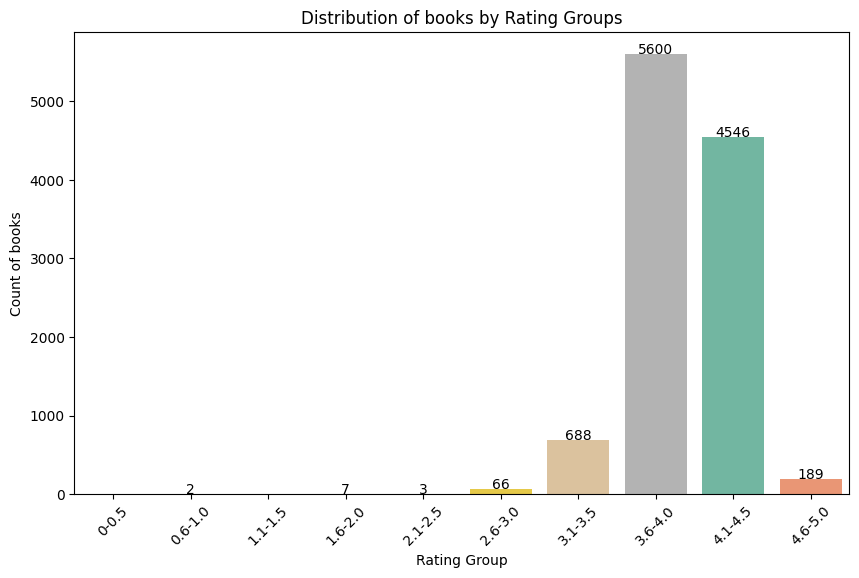

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating_group',data=df, palette ='Set2')
for p in plt.gca().patches:
    h=p.get_height()
    plt.text(p.get_x() +p.get_width()/2, h+1, str(int(h)), horizontalalignment='center', fontsize=10, color='black')

plt.xlabel("Rating Group")
plt.ylabel("Count of books")
plt.title("Distribution of books by Rating Groups")
plt.xticks(rotation=45)

plt.show()

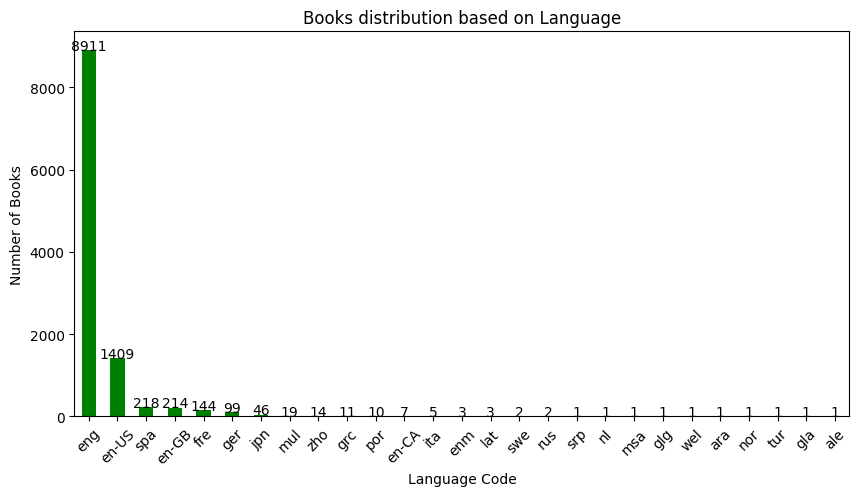

In [78]:
plt.figure(figsize=(10,5))

ax = df['language_code'].value_counts().plot(kind='bar', color='green')

for p in ax.patches:
    h=p.get_height()
    ax.text(p.get_x() +p.get_width()/2, h+1, str(int(h)), horizontalalignment='center', fontsize=10, color='black')

plt.xlabel("Language Code")
plt.ylabel("Number of Books")
plt.title("Books distribution based on Language")
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

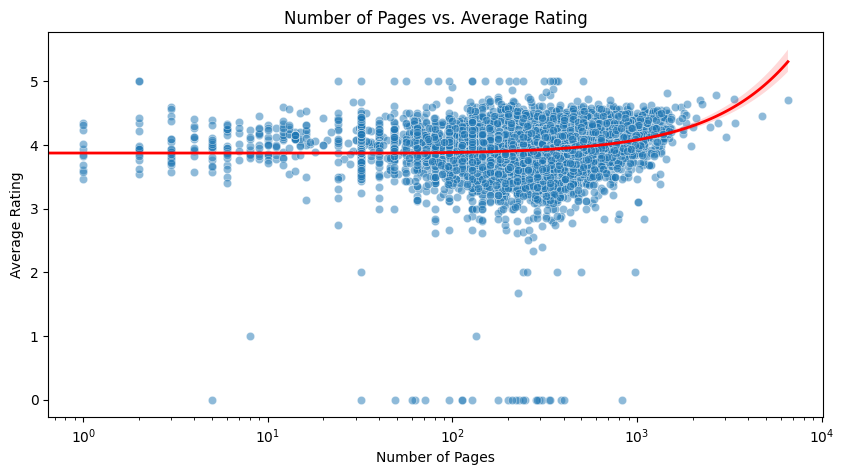

In [88]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=df["num_pages"], y=df["average_rating"], alpha=0.5)

plt.xscale("log")

sns.regplot(x=df["num_pages"], y=df["average_rating"], scatter=False, color="red", line_kws={"linewidth": 2})


plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.title("Number of Pages vs. Average Rating")

plt.show()

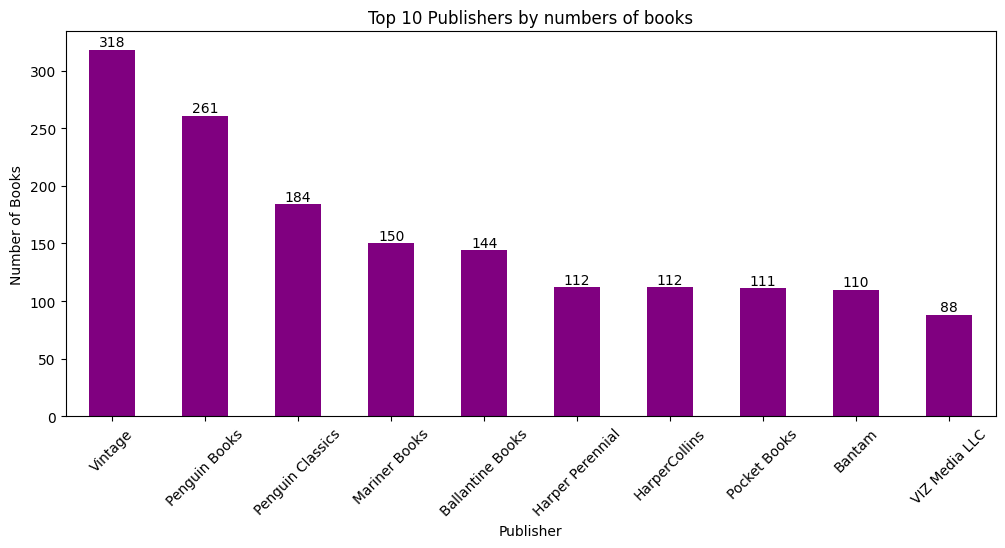

In [93]:
plt.figure(figsize=(12,5))

publisher_counts = df['publisher'].value_counts().nlargest(10)
ax= publisher_counts.plot(kind='bar', color='purple')

plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.title("Top 10 Publishers by numbers of books")
plt.xticks(rotation=45)

for i, value in enumerate(publisher_counts):
    ax.text(i, value+0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


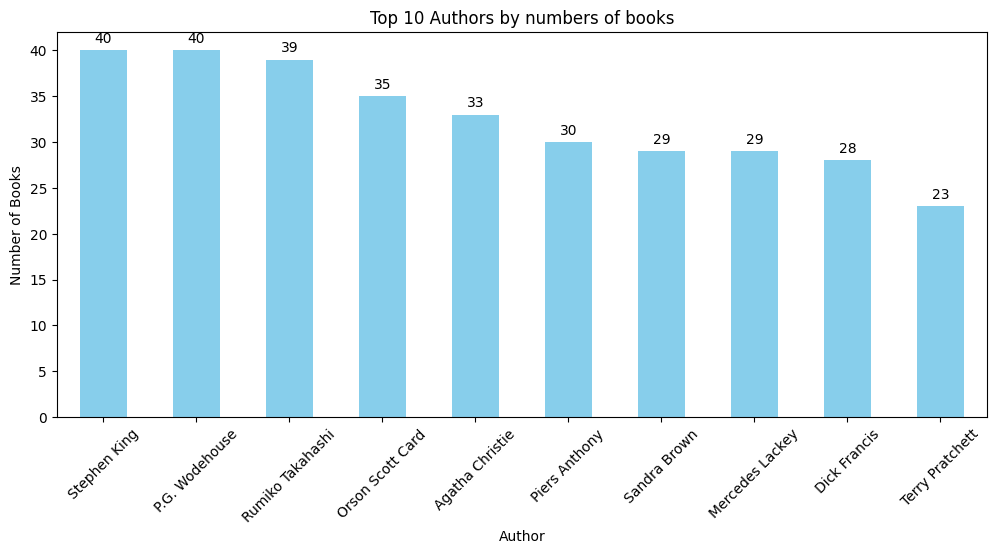

In [97]:
plt.figure(figsize=(12,5))

author_counts = df['authors'].value_counts().nlargest(10)
author_counts.plot(kind='bar', color='skyblue')

plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.title("Top 10 Authors by numbers of books")
plt.xticks(rotation=45)

for i, value in enumerate(author_counts):
    plt.text(i, value+0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

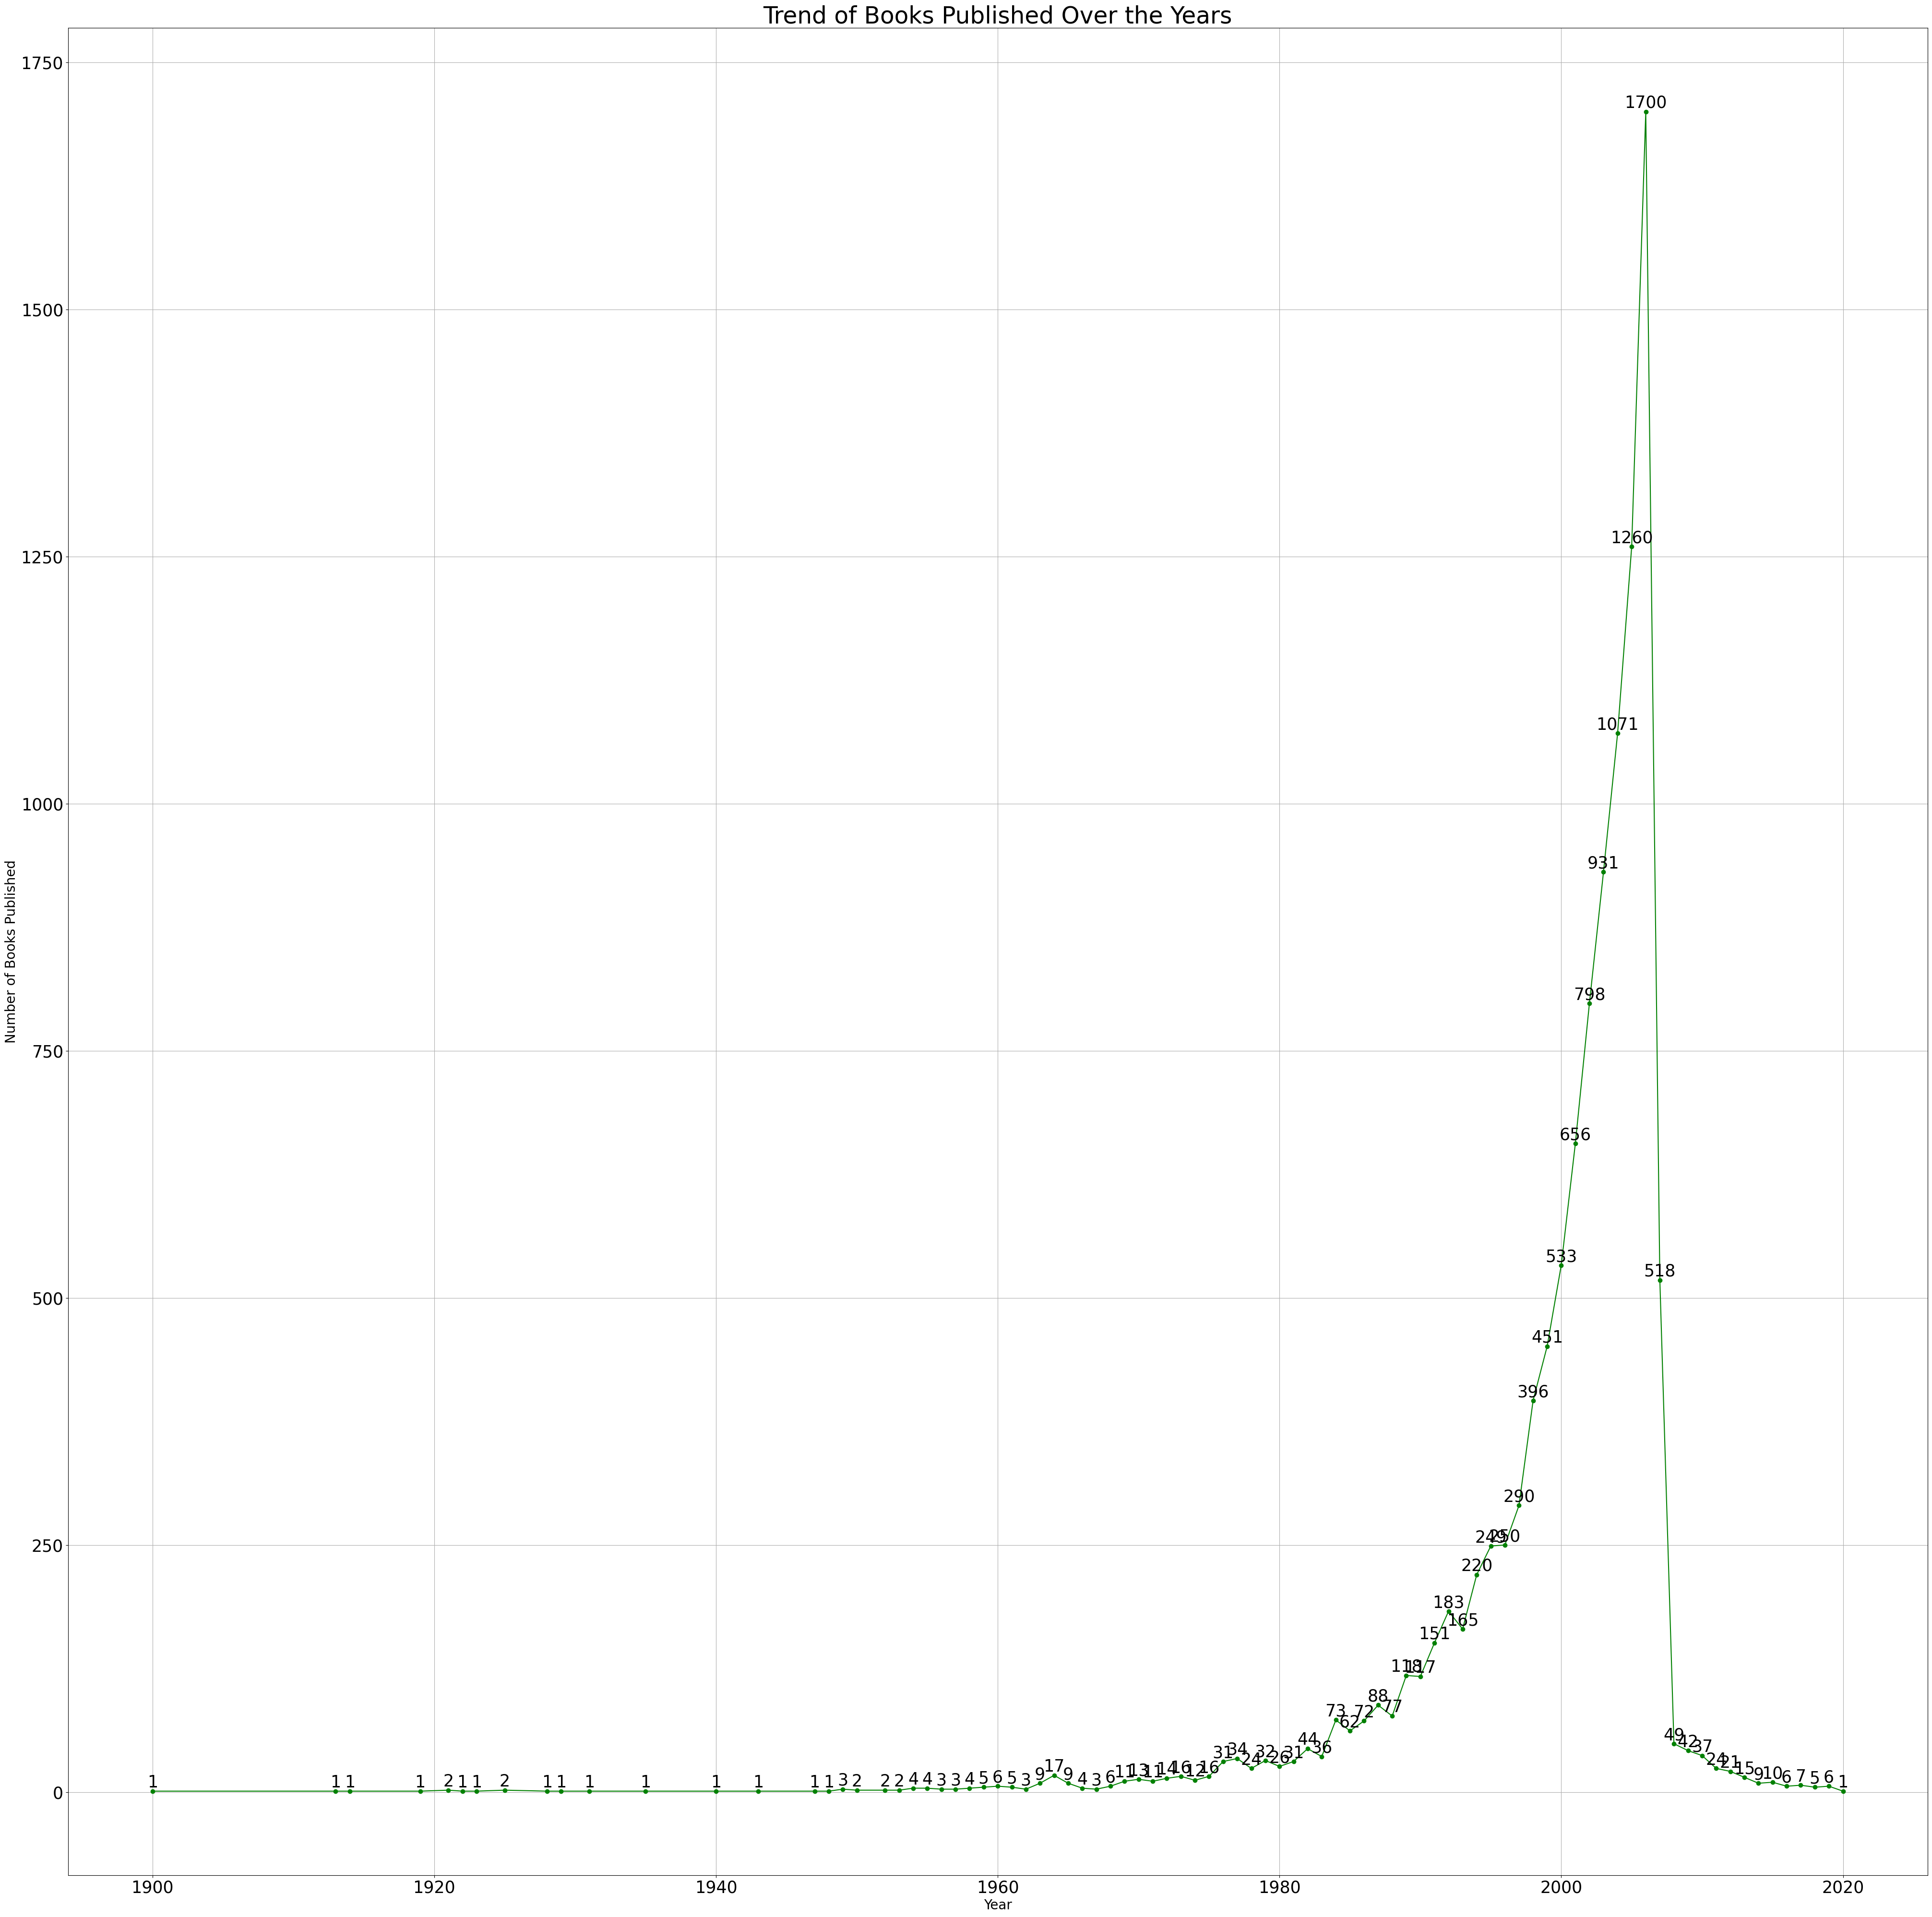

In [107]:

df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

if 'publication_date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['publication_date']):
    plt.figure(figsize=(50, 50))
    yearly_counts = df["publication_date"].dt.year.value_counts().sort_index()
    yearly_counts.plot(kind="line", marker="o", color="green")

    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Number of Books Published", fontsize=20)
    plt.title("Trend of Books Published Over the Years", fontsize=35)
    plt.grid(True)

    plt.xticks(fontsize=25)  # x-axis labels (years)
    plt.yticks(fontsize=25)  # y-axis labels (count of books)

    for i, value in enumerate(yearly_counts):
        plt.text(yearly_counts.index[i], value + 0.5, str(value), ha='center', va='bottom', fontsize=25)

    plt.show()
else:
    print("The 'publication_date' column is not in the correct datetime format.")
